# Uso de logaritmo en la regresión lineal

 La regresión lineal es una técnica estadística que se utiliza para modelar la relación entre una variable dependiente $Y$ y una o más variables independientes $X$.

En algunos casos, se usa el logaritmo de una variable en la regresión lineal para varios propósitos:

1. **Linealización de Relaciones No Lineales**: Si la relación entre las variables no es lineal, aplicar un logaritmo puede transformar la relación en una más lineal, lo que hace que los supuestos de la regresión lineal sean más apropiados.

Por ejemplo, si la relación entre $Y$ y $X$ es exponencial,
$$Y = e^{b_o+b_1X}$$
tomar el logaritmo natural convierte la relación en una forma lineal:

$$\ln (Y) = (b_o+b_1X)\ln(e)$$

$$\ln (Y) = b_o+b_1X$$

2. **Estabilización de la Varianza:** En algunas series de datos, la varianza de la variable dependiente puede aumentar con el nivel de la variable independiente. Tomar el logaritmo puede ayudar a estabilizar la varianza (homocedasticidad), que es uno de los supuestos de la regresión lineal.

3. **Mejora de la Normalidad de los Errores:** Los residuos de la regresión deben estar normalmente distribuidos. Si los datos originales no cumplen con este supuesto, una transformación logarítmica puede ayudar a mejorar la normalidad de los errores.

4. **Interpretabilidad:** A veces, tomar el logaritmo de las variables puede facilitar la interpretación de los coeficientes de regresión. Por ejemplo, en un modelo de regresión log-log ($log(Y)$ vs. $log(X)$), los coeficientes representan elasticidades, es decir, el cambio porcentual en $Y$ debido a un cambio porcentual en $X$.

## Ejemplo

Simulación de la base de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Semilla para la reproducibilidad
np.random.seed(103)

# Generación de datos simulados
n = 500
educacion = np.random.normal(12, 2, n)  # años de educación alrededor de 12 años
error = np.random.normal(0, 0.5, n)  # error aleatorio

# Relación exponencial entre ingreso y educación
ingreso = 30 * np.exp(0.1 * educacion) + error

# Crear DataFrame
data = pd.DataFrame({
    'educacion': educacion,
    'ingreso': ingreso
})


Visualicemos un diagrama de dispersión de lestas dos varibles:

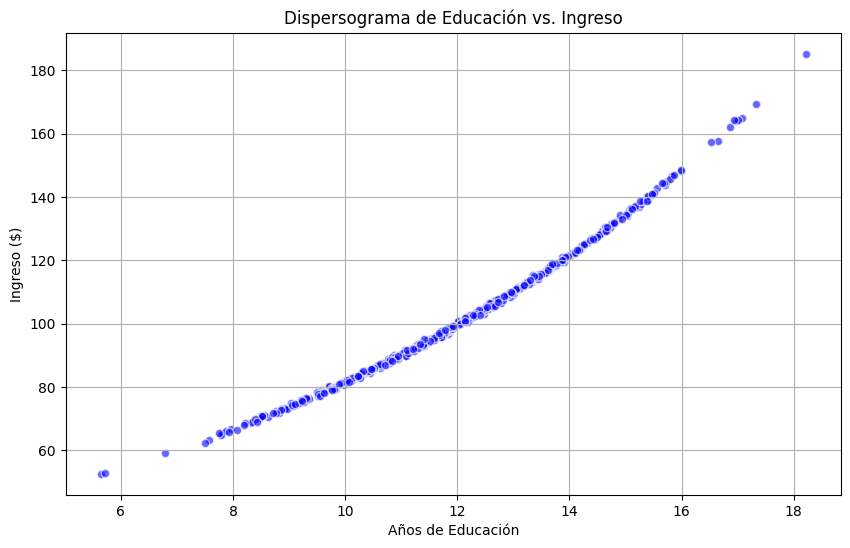

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.scatter(data['educacion'], data['ingreso'], alpha=0.6, color='blue', edgecolors='w')
plt.title('Dispersograma de Educación vs. Ingreso')
plt.xlabel('Años de Educación')
plt.ylabel('Ingreso ($)')
plt.grid(True)
plt.show()


#### Construcción del modelo lineal simple

Modelo en escala original:
                             OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.469e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:28   Log-Likelihood:                -1253.3
No. Observations:                 500   AIC:                             2511.
Df Residuals:                     498   BIC:                             2519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.7206   

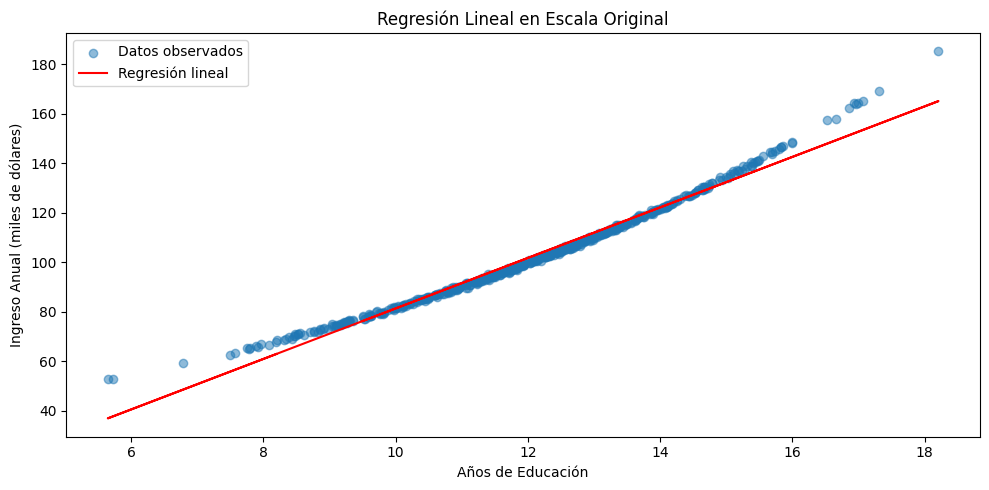

In [3]:

# Modelos de regresión
X = sm.add_constant(data['educacion'])

# Modelo en escala original
modelo_original = sm.OLS(data['ingreso'], X).fit()

# Mostrar resultados
print("Modelo en escala original:\n", modelo_original.summary())

# Graficar los datos y las regresiones
plt.figure(figsize=(10, 5))

# Escala original
plt.scatter(data['educacion'], data['ingreso'], alpha=0.5, label='Datos observados') # Datos
plt.plot(data['educacion'], modelo_original.predict(X), color='red', label='Regresión lineal') # Predicciones
plt.xlabel('Años de Educación')
plt.ylabel('Ingreso Anual (miles de dólares)')
plt.title('Regresión Lineal en Escala Original')
plt.legend()

plt.tight_layout()
plt.show()


#### Modelo ajustado

Ahora vamos a aplicar el logaritmo natural a la variable $Y$.


Modelo en escala logarítmica:
                             OLS Regression Results                            
Dep. Variable:            log_ingreso   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.674e+05
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:30   Log-Likelihood:                 1948.6
No. Observations:                 500   AIC:                            -3893.
Df Residuals:                     498   BIC:                            -3885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.400

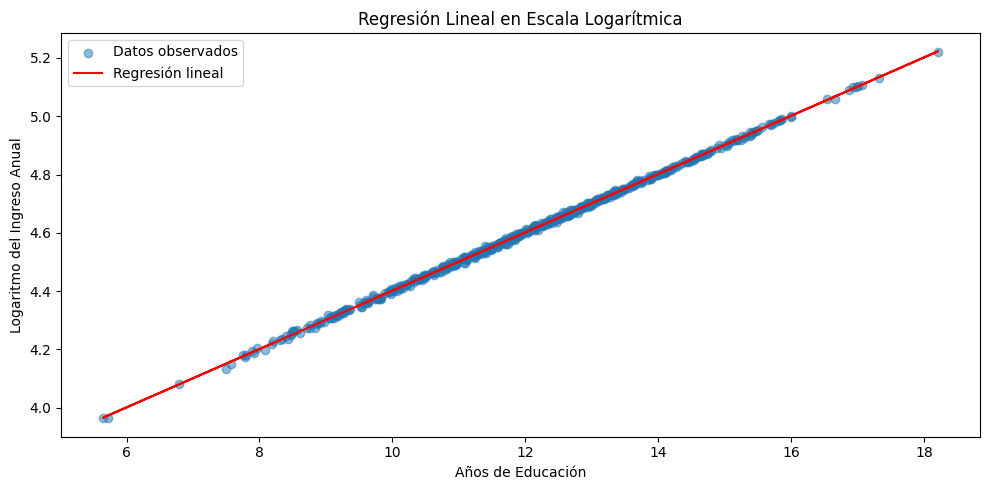

In [4]:
# Transformación logarítmica del ingreso

data['log_ingreso'] = np.log(data['ingreso'])

# Modelos de regresión
X = sm.add_constant(data['educacion'])

# Modelo en escala logarítmica
modelo_log = sm.OLS(data['log_ingreso'], X).fit()

# Mostrar resultados
print("\nModelo en escala logarítmica:\n", modelo_log.summary())

# Graficar los datos y las regresiones
plt.figure(figsize=(10, 5))

# Escala logarítmica
plt.scatter(data['educacion'], data['log_ingreso'], alpha=0.5, label='Datos observados')
plt.plot(data['educacion'], modelo_log.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Años de Educación')
plt.ylabel('Logaritmo del Ingreso Anual')
plt.title('Regresión Lineal en Escala Logarítmica')
plt.legend()

plt.tight_layout()
plt.show()

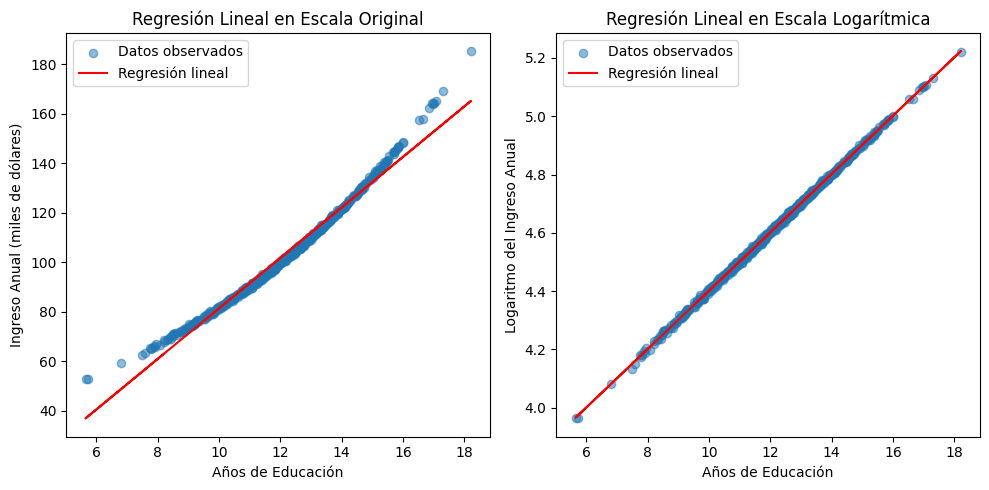

In [5]:
# Graficar los datos y las regresiones
plt.figure(figsize=(10, 5))

# Escala original
plt.subplot(1, 2, 1)
plt.scatter(data['educacion'], data['ingreso'], alpha=0.5, label='Datos observados')
plt.plot(data['educacion'], modelo_original.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Años de Educación')
plt.ylabel('Ingreso Anual (miles de dólares)')
plt.title('Regresión Lineal en Escala Original')
plt.legend()

# Escala logarítmica
plt.subplot(1, 2, 2)
plt.scatter(data['educacion'], data['log_ingreso'], alpha=0.5, label='Datos observados')
plt.plot(data['educacion'], modelo_log.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Años de Educación')
plt.ylabel('Logaritmo del Ingreso Anual')
plt.title('Regresión Lineal en Escala Logarítmica')
plt.legend()

plt.tight_layout()
plt.show()


Modelo en escala raíz cuadrada:
                             OLS Regression Results                            
Dep. Variable:           sqrt_ingreso   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.274e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:35   Log-Likelihood:                 582.72
No. Observations:                 500   AIC:                            -1161.
Df Residuals:                     498   BIC:                            -1153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9

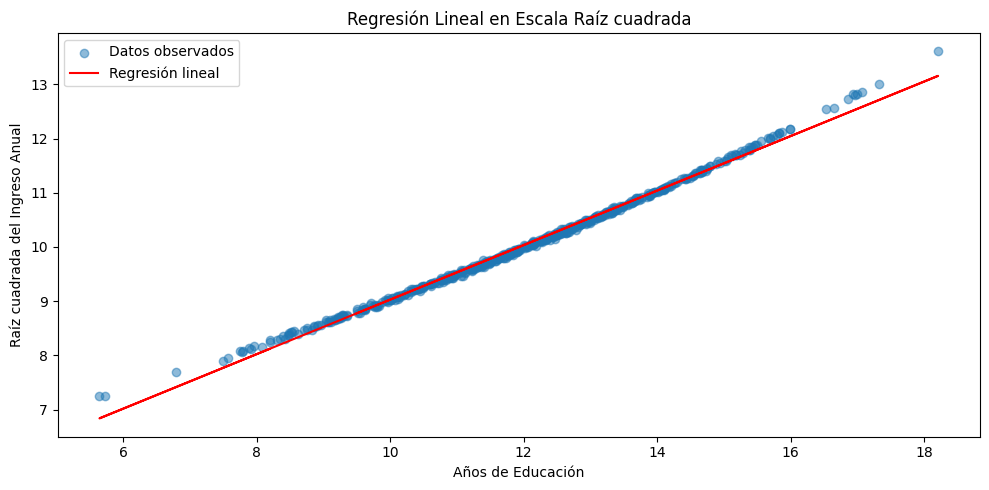

In [6]:
# Transformación logarítmica del ingreso

data['sqrt_ingreso'] = np.sqrt(data['ingreso'])

# Modelos de regresión
X = sm.add_constant(data['educacion'])

# Modelo en escala logarítmica
modelo_sqrt = sm.OLS(data['sqrt_ingreso'], X).fit()

# Mostrar resultados
print("\nModelo en escala raíz cuadrada:\n", modelo_sqrt.summary())

# Graficar los datos y las regresiones
plt.figure(figsize=(10, 5))

# Escala logarítmica
plt.scatter(data['educacion'], data['sqrt_ingreso'], alpha=0.5, label='Datos observados')
plt.plot(data['educacion'], modelo_sqrt.predict(X), color='red', label='Regresión lineal')
plt.xlabel('Años de Educación')
plt.ylabel('Raíz cuadrada del Ingreso Anual')
plt.title('Regresión Lineal en Escala Raíz cuadrada')
plt.legend()

plt.tight_layout()
plt.show()

### Ejemplo

Veamos ahora un ejemplo con un modelo de regresión múltiple.

Primero, vamos a generar una base de datos simulada para una regresión multilineal, donde el ingreso anual $Y$ (en miles de dólares) dependerá de múltiples variables ($X$): años de educación, años de experiencia laboral y una variable categórica que indique si la persona tiene un título avanzado (maestría o doctorado).

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Semilla para la reproducibilidad
np.random.seed(42)

# Generación de datos simulados
n = 500
educacion = np.random.normal(12, 2, n)  # años de educación alrededor de 12 años
experiencia = np.random.normal(10, 5, n)  # años de experiencia laboral
titulo_avanzado = np.random.choice([0, 1], size=n)  # 0: no tiene título avanzado, 1: tiene título avanzado
error = np.random.normal(0, 0.5, n)  # error aleatorio

# Relación lineal entre ingreso y las variables explicativas
ingreso = 20 + 2 * educacion + 1.5 * experiencia + 5 * titulo_avanzado + error

# Crear DataFrame
data = pd.DataFrame({
    'educacion': educacion,
    'experiencia': experiencia,
    'titulo_avanzado': titulo_avanzado,
    'ingreso': ingreso
})


Veamos una a una, la elación entre las variables:

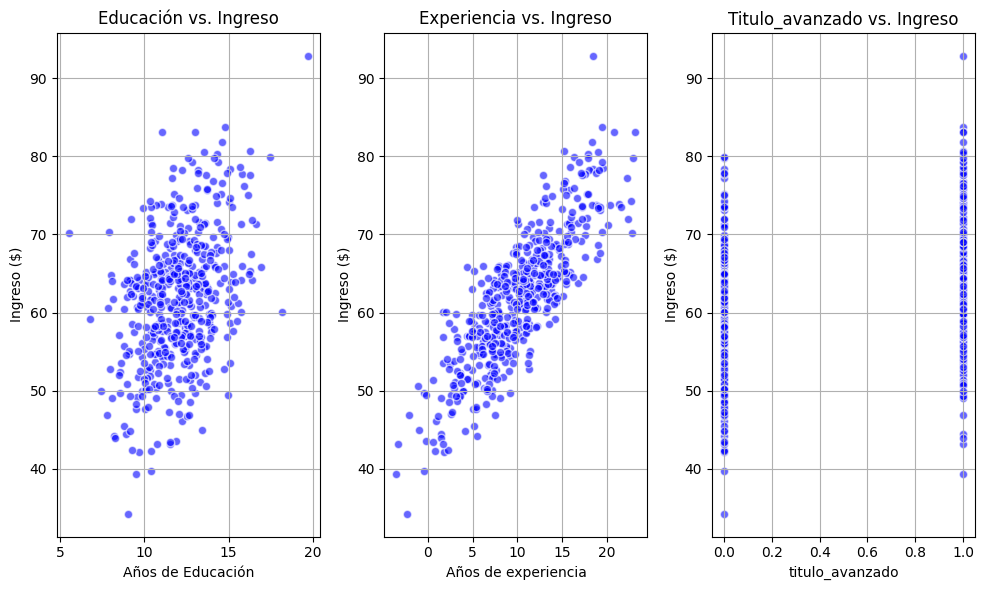

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.scatter(data['educacion'], data['ingreso'], alpha=0.6, color='blue', edgecolors='w')
plt.title('Educación vs. Ingreso')
plt.xlabel('Años de Educación')
plt.ylabel('Ingreso ($)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(data['experiencia'], data['ingreso'], alpha=0.6, color='blue', edgecolors='w')
plt.title('Experiencia vs. Ingreso')
plt.xlabel('Años de experiencia')
plt.ylabel('Ingreso ($)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(data['titulo_avanzado'], data['ingreso'], alpha=0.6, color='blue', edgecolors='w')
plt.title('Titulo_avanzado vs. Ingreso')
plt.xlabel('titulo_avanzado')
plt.ylabel('Ingreso ($)')
plt.grid(True)


plt.tight_layout()
plt.show()

Creemos ahora el modelo:

                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.737e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:39   Log-Likelihood:                -360.66
No. Observations:                 500   AIC:                             729.3
Df Residuals:                     496   BIC:                             746.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.8075      0.152    1

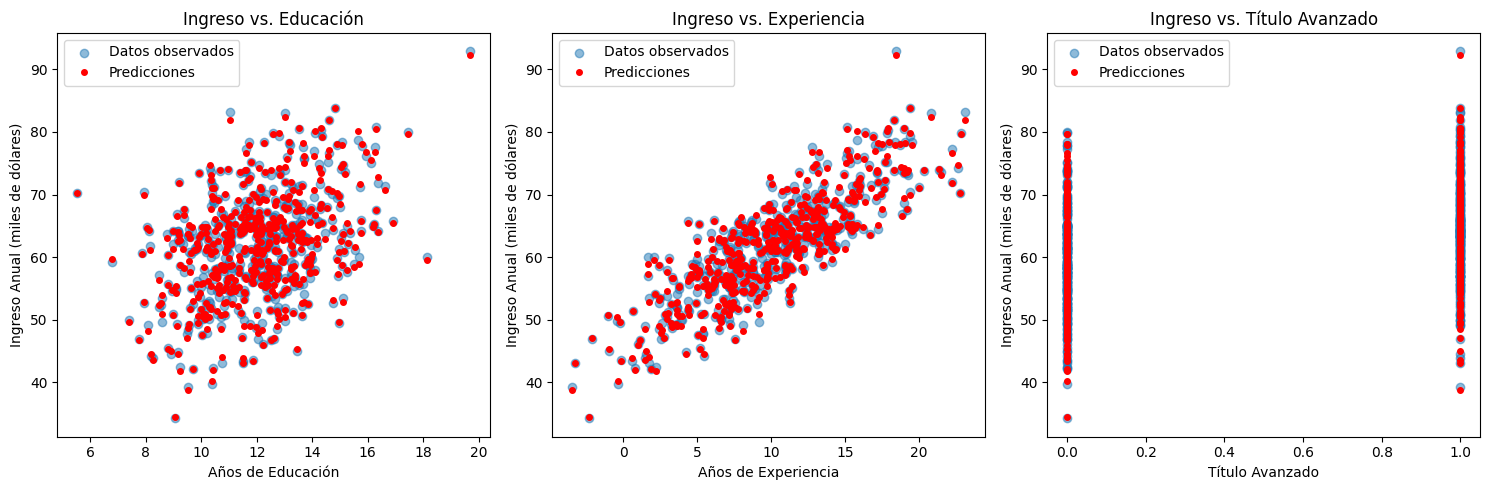

In [9]:
# Modelos de regresión
X = sm.add_constant(data[['educacion', 'experiencia', 'titulo_avanzado']])
modelo = sm.OLS(data['ingreso'], X).fit()

# Mostrar resultados
print(modelo.summary())

# Graficar los datos y las predicciones
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de ingreso vs. educación
axs[0].scatter(data['educacion'], data['ingreso'], alpha=0.5, label='Datos observados')
axs[0].plot(data['educacion'], modelo.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[0].set_xlabel('Años de Educación')
axs[0].set_ylabel('Ingreso Anual (miles de dólares)')
axs[0].set_title('Ingreso vs. Educación')
axs[0].legend()

# Gráfico de ingreso vs. experiencia
axs[1].scatter(data['experiencia'], data['ingreso'], alpha=0.5, label='Datos observados')
axs[1].plot(data['experiencia'], modelo.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[1].set_xlabel('Años de Experiencia')
axs[1].set_ylabel('Ingreso Anual (miles de dólares)')
axs[1].set_title('Ingreso vs. Experiencia')
axs[1].legend()

# Gráfico de ingreso vs. título avanzado
axs[2].scatter(data['titulo_avanzado'], data['ingreso'], alpha=0.5, label='Datos observados')
axs[2].plot(data['titulo_avanzado'], modelo.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[2].set_xlabel('Título Avanzado')
axs[2].set_ylabel('Ingreso Anual (miles de dólares)')
axs[2].set_title('Ingreso vs. Título Avanzado')
axs[2].legend()

plt.tight_layout()
plt.show()


veamos ahora cómo cambia el modelo si usamos el logaritmo natural para la variable $Y$.

                            OLS Regression Results                            
Dep. Variable:            log_ingreso   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:44   Log-Likelihood:                 1334.4
No. Observations:                 500   AIC:                            -2661.
Df Residuals:                     496   BIC:                            -2644.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4258      0.005    6

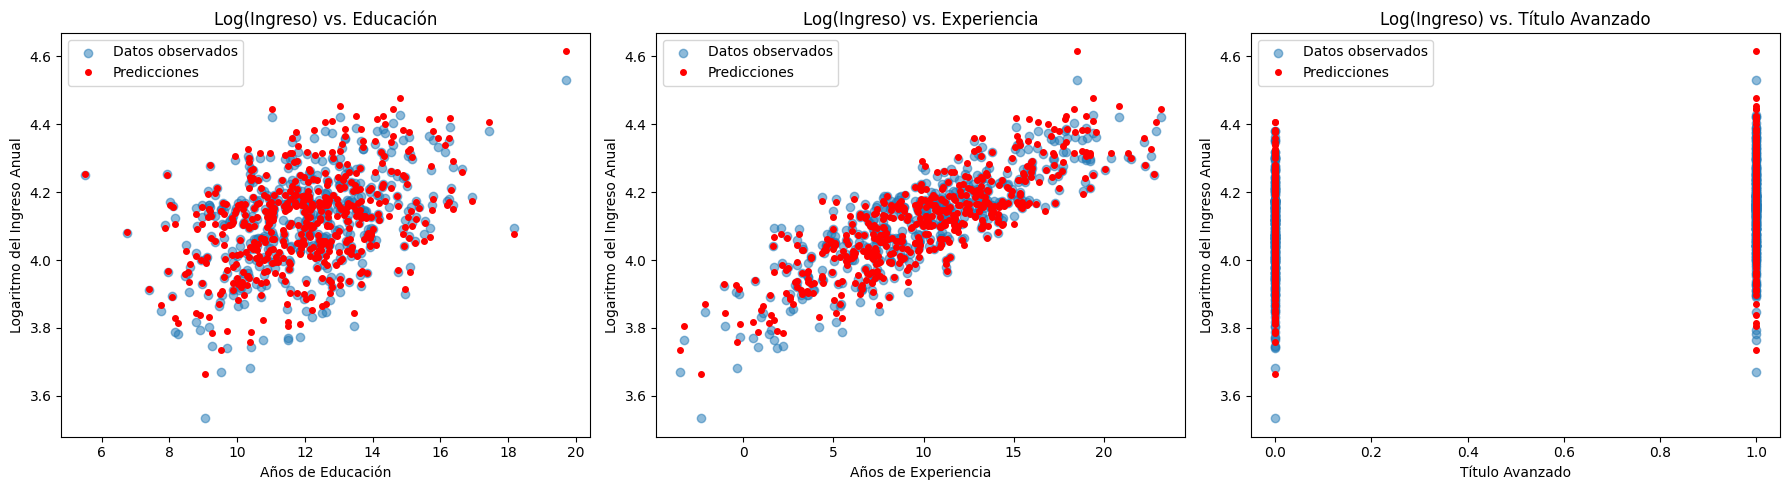

In [10]:
# Transformación logarítmica del ingreso
data['log_ingreso'] = np.log(data['ingreso'])

# Modelos de regresión con ingreso logarítmico
modelo_log = sm.OLS(data['log_ingreso'], X).fit()

# Mostrar resultados
print(modelo_log.summary())

# Graficar los datos y las predicciones
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de log_ingreso vs. educación
axs[0].scatter(data['educacion'], data['log_ingreso'], alpha=0.5, label='Datos observados')
axs[0].plot(data['educacion'], modelo_log.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[0].set_xlabel('Años de Educación')
axs[0].set_ylabel('Logaritmo del Ingreso Anual')
axs[0].set_title('Log(Ingreso) vs. Educación')
axs[0].legend()

# Gráfico de log_ingreso vs. experiencia
axs[1].scatter(data['experiencia'], data['log_ingreso'], alpha=0.5, label='Datos observados')
axs[1].plot(data['experiencia'], modelo_log.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[1].set_xlabel('Años de Experiencia')
axs[1].set_ylabel('Logaritmo del Ingreso Anual')
axs[1].set_title('Log(Ingreso) vs. Experiencia')
axs[1].legend()

# Gráfico de log_ingreso vs. título avanzado
axs[2].scatter(data['titulo_avanzado'], data['log_ingreso'], alpha=0.5, label='Datos observados')
axs[2].plot(data['titulo_avanzado'], modelo_log.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[2].set_xlabel('Título Avanzado')
axs[2].set_ylabel('Logaritmo del Ingreso Anual')
axs[2].set_title('Log(Ingreso) vs. Título Avanzado')
axs[2].legend()

plt.tight_layout()
plt.show()


Y la raíz cuadrada??

                            OLS Regression Results                            
Dep. Variable:           sqrt_ingreso   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.694e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:50   Log-Likelihood:                 873.01
No. Observations:                 500   AIC:                            -1738.
Df Residuals:                     496   BIC:                            -1721.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1619      0.013    3

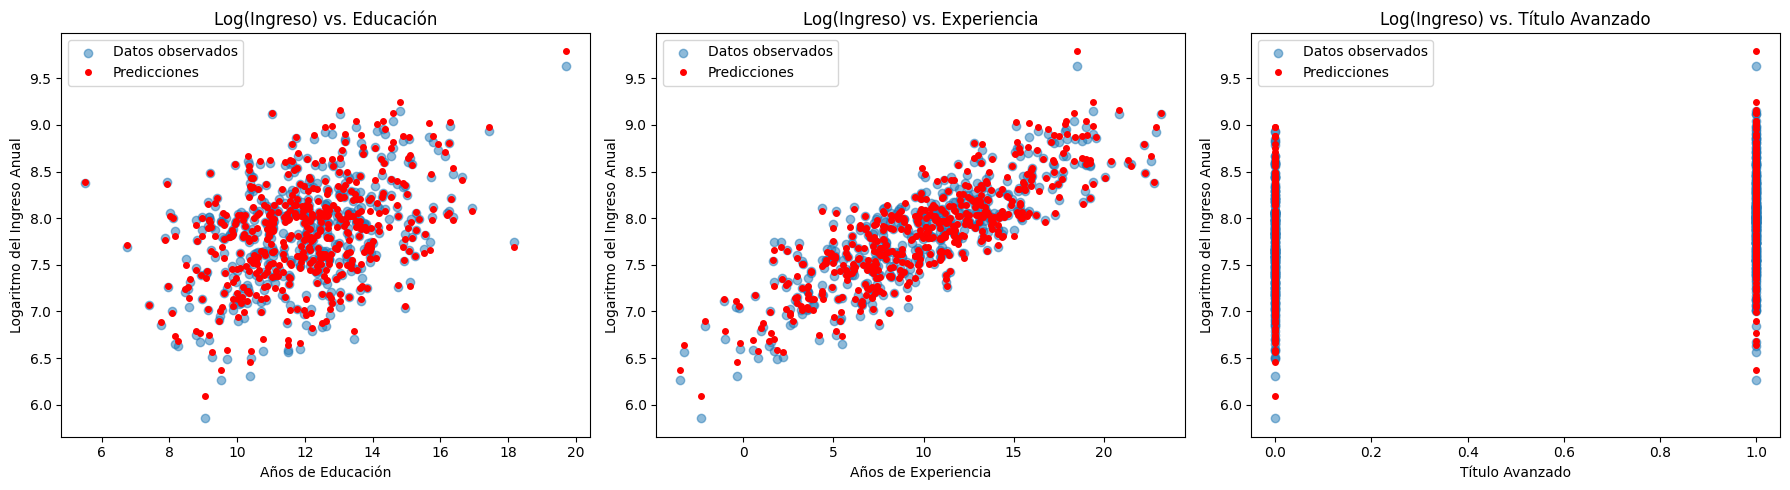

In [11]:
# Transformación logarítmica del ingreso
data['sqrt_ingreso'] = np.sqrt(data['ingreso'])

# Modelos de regresión con ingreso logarítmico
modelo_sqrt = sm.OLS(data['sqrt_ingreso'], X).fit()

# Mostrar resultados
print(modelo_sqrt.summary())

# Graficar los datos y las predicciones
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de log_ingreso vs. educación
axs[0].scatter(data['educacion'], data['sqrt_ingreso'], alpha=0.5, label='Datos observados')
axs[0].plot(data['educacion'], modelo_sqrt.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[0].set_xlabel('Años de Educación')
axs[0].set_ylabel('Logaritmo del Ingreso Anual')
axs[0].set_title('Log(Ingreso) vs. Educación')
axs[0].legend()

# Gráfico de log_ingreso vs. experiencia
axs[1].scatter(data['experiencia'], data['sqrt_ingreso'], alpha=0.5, label='Datos observados')
axs[1].plot(data['experiencia'], modelo_sqrt.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[1].set_xlabel('Años de Experiencia')
axs[1].set_ylabel('Logaritmo del Ingreso Anual')
axs[1].set_title('Log(Ingreso) vs. Experiencia')
axs[1].legend()

# Gráfico de log_ingreso vs. título avanzado
axs[2].scatter(data['titulo_avanzado'], data['sqrt_ingreso'], alpha=0.5, label='Datos observados')
axs[2].plot(data['titulo_avanzado'], modelo_sqrt.predict(X), color='red', linestyle='None', marker='o', markersize=4, label='Predicciones')
axs[2].set_xlabel('Título Avanzado')
axs[2].set_ylabel('Logaritmo del Ingreso Anual')
axs[2].set_title('Log(Ingreso) vs. Título Avanzado')
axs[2].legend()

plt.tight_layout()
plt.show()


Observemos la gráficas de los residuos:

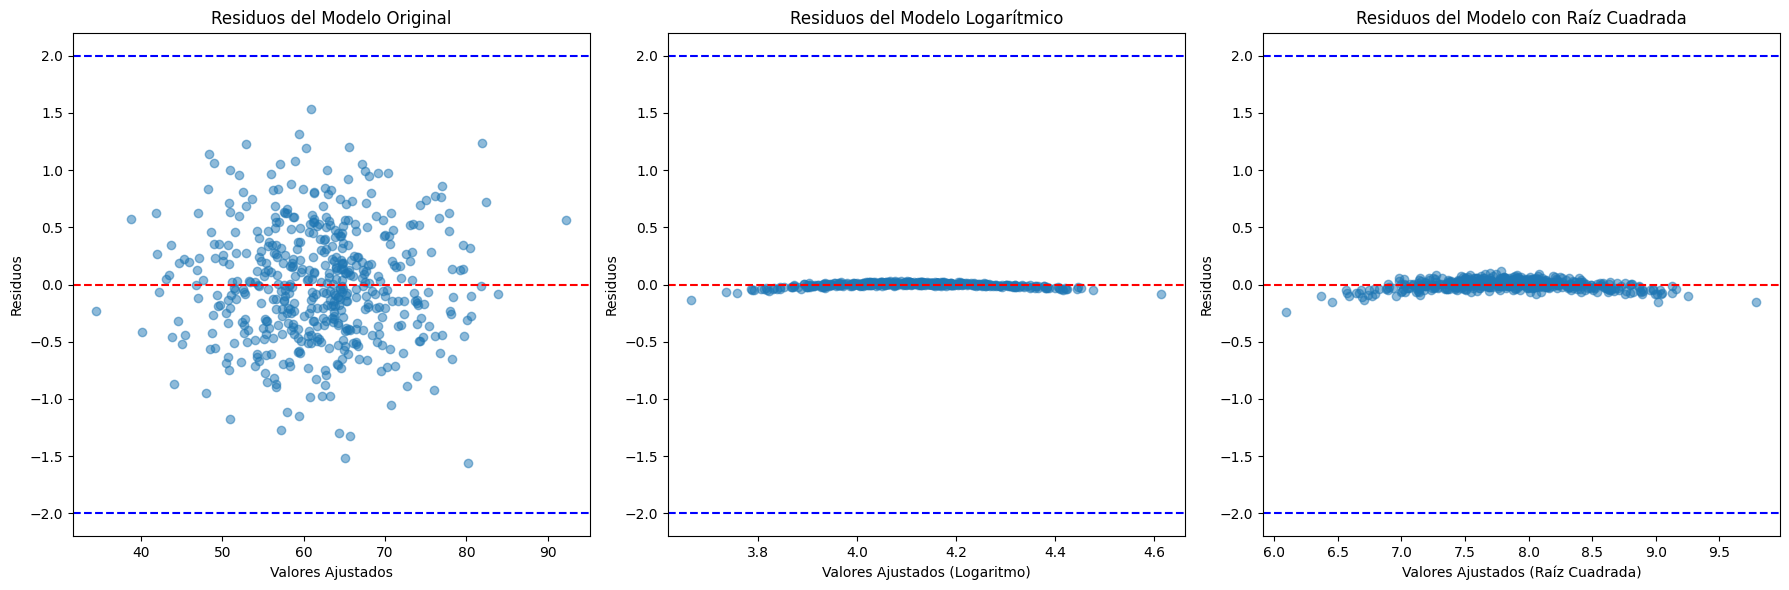

In [12]:
# Generar los residuos de los tres modelos
residuos_original = modelo.resid
residuos_log = modelo_log.resid
residuos_sqrt = modelo_sqrt.resid

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Residuos del modelo original
axs[0].scatter(modelo.fittedvalues, residuos_original, alpha=0.5)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].axhline(y=2, color='blue', linestyle='--')
axs[0].axhline(y=-2, color='blue', linestyle='--')
axs[0].set_xlabel('Valores Ajustados')
axs[0].set_ylabel('Residuos')
axs[0].set_title('Residuos del Modelo Original')

# Residuos del modelo logarítmico
axs[1].scatter(modelo_log.fittedvalues, residuos_log, alpha=0.5)
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].axhline(y=2, color='blue', linestyle='--')
axs[1].axhline(y=-2, color='blue', linestyle='--')
axs[1].set_xlabel('Valores Ajustados (Logaritmo)')
axs[1].set_ylabel('Residuos')
axs[1].set_title('Residuos del Modelo Logarítmico')

# Residuos del modelo con raíz cuadrada
axs[2].scatter(modelo_sqrt.fittedvalues, residuos_sqrt, alpha=0.5)
axs[2].axhline(y=0, color='red', linestyle='--')
axs[2].axhline(y=2, color='blue', linestyle='--')
axs[2].axhline(y=-2, color='blue', linestyle='--')
axs[2].set_xlabel('Valores Ajustados (Raíz Cuadrada)')
axs[2].set_ylabel('Residuos')
axs[2].set_title('Residuos del Modelo con Raíz Cuadrada')

plt.tight_layout()
plt.show()



## La transformación de Box-Cox

La transformación de Box-Cox es una técnica utilizada para estabilizar la varianza y hacer que los datos se asemejen más a una distribución normal. Es particularmente útil cuando los supuestos de homocedasticidad (varianza constante) y normalidad de los residuos no se cumplen en un modelo de regresión.

La transformación de Box-Cox se define como:

$$\begin{cases}
\cfrac{y^{\lambda}-1}{\lambda}, \text{ si } \lambda \neq 0\\
\log(y), \text{ si } \lambda \neq 0\\
\end{cases}$$

Donde $λ$ es el parámetro de transformación que se estima a partir de los datos. La transformación de Box-Cox puede manejar tanto datos positivos como no negativos (con un ajuste).

### Pasos para aplicar la Transformación de Box-Cox

Aplicación de la Transformación:
1. Asegurarse de que todos los valores sean positivos. Si no lo son, ajustar los datos sumando una constante para que todos los valores sean mayores que cero.
$$y_{+} = y+1-y_{\min}$$

2. Utilizar la transformación de Box-Cox para encontrar el valor óptimo de $λ$.
3. Modelo de Regresión: Ajustar el modelo de regresión utilizando los datos transformados.
4. Análisis de Residuos: Evaluar los residuos del modelo para verificar si los supuestos de homocedasticidad y normalidad se cumplen mejor con los datos transformados.

                            OLS Regression Results                            
Dep. Variable:         ingreso_boxcox   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.642e+04
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        01:20:56   Log-Likelihood:                -304.14
No. Observations:                 500   AIC:                             616.3
Df Residuals:                     496   BIC:                             633.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0340      0.136    -

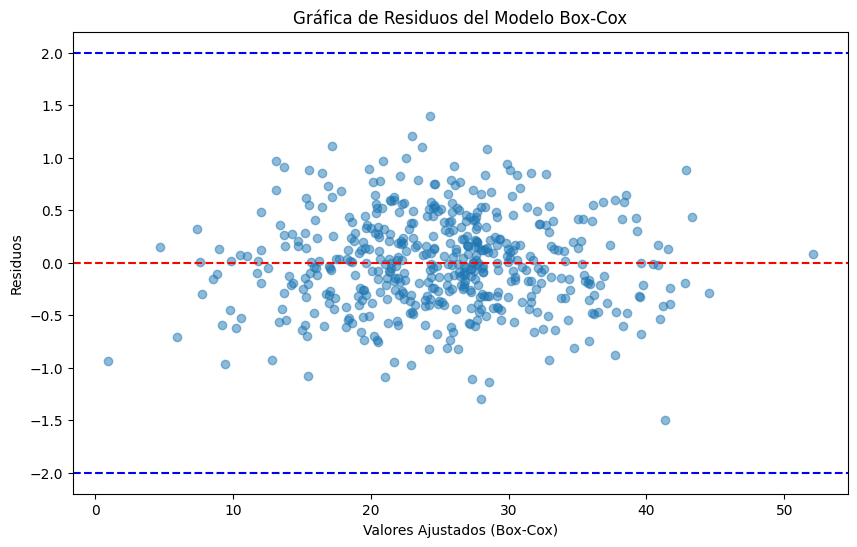

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox

# Aplicar la transformación de Box-Cox
ingreso_positivo = data['ingreso'] + 1 - data['ingreso'].min()  # Asegurarse de que todos los valores sean positivos
ingreso_boxcox, lambda_opt = boxcox(ingreso_positivo)

# Añadir la variable transformada al DataFrame
data['ingreso_boxcox'] = ingreso_boxcox

# Ajustar el modelo de regresión con los datos transformados
X = sm.add_constant(data[['educacion', 'experiencia', 'titulo_avanzado']])
modelo_boxcox = sm.OLS(data['ingreso_boxcox'], X).fit()

# Mostrar los resultados
print(modelo_boxcox.summary())
print(f"Valor óptimo de lambda: {lambda_opt}")

# Graficar los residuos del modelo Box-Cox
residuos_boxcox = modelo_boxcox.resid

plt.figure(figsize=(10, 6))
plt.scatter(modelo_boxcox.fittedvalues, residuos_boxcox, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=2, color='blue', linestyle='--')
plt.axhline(y=-2, color='blue', linestyle='--')
plt.xlabel('Valores Ajustados (Box-Cox)')
plt.ylabel('Residuos')
plt.title('Gráfica de Residuos del Modelo Box-Cox')
plt.show()


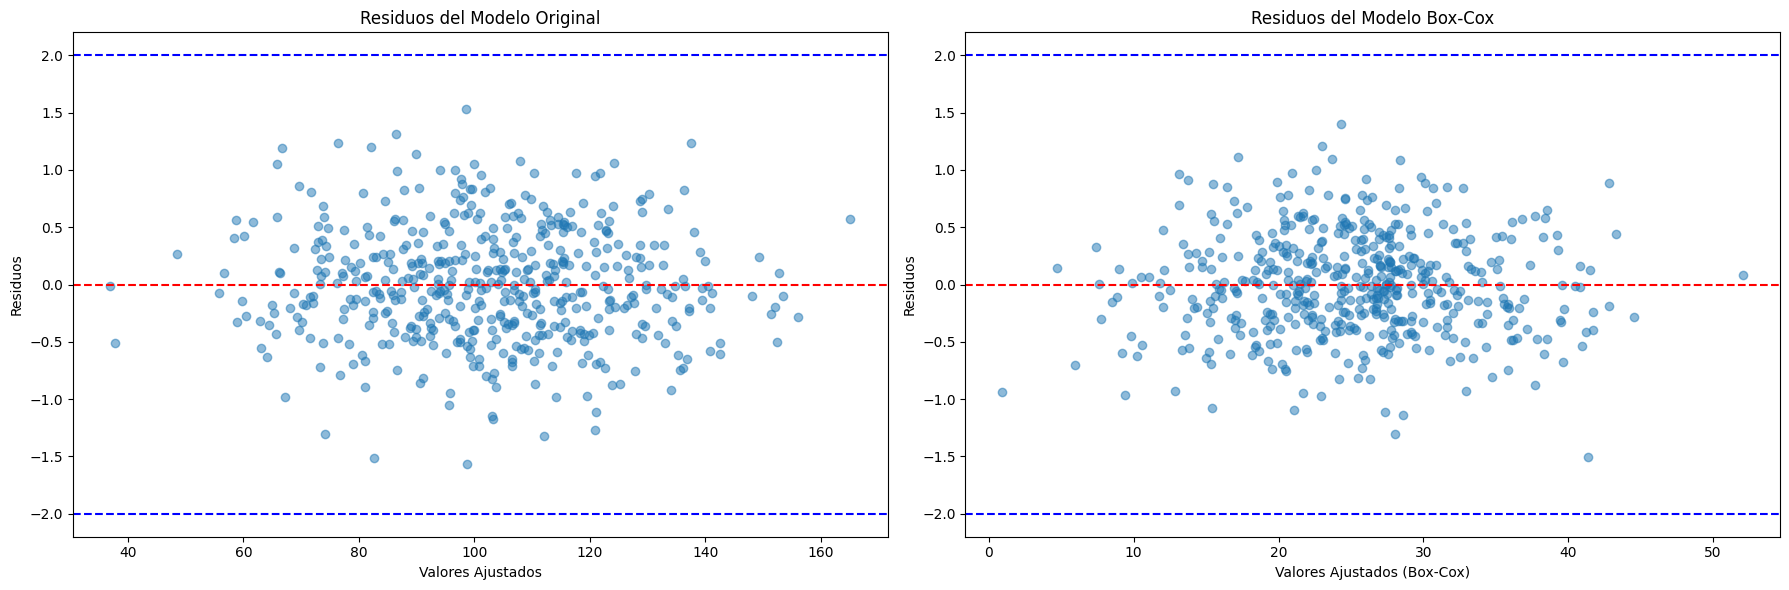

In [14]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Residuos del modelo original
axs[0].scatter(modelo_original.fittedvalues, residuos_original, alpha=0.5)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].axhline(y=2, color='blue', linestyle='--')
axs[0].axhline(y=-2, color='blue', linestyle='--')
axs[0].set_xlabel('Valores Ajustados')
axs[0].set_ylabel('Residuos')
axs[0].set_title('Residuos del Modelo Original')

# Residuos del modelo Box-Cox
axs[1].scatter(modelo_boxcox.fittedvalues, residuos_boxcox, alpha=0.5)
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].axhline(y=2, color='blue', linestyle='--')
axs[1].axhline(y=-2, color='blue', linestyle='--')
axs[1].set_xlabel('Valores Ajustados (Box-Cox)')
axs[1].set_ylabel('Residuos')
axs[1].set_title('Residuos del Modelo Box-Cox')

plt.tight_layout()
plt.show()

Esta transformación tambien suele usarse para mejorar la normalidad de los residuos:

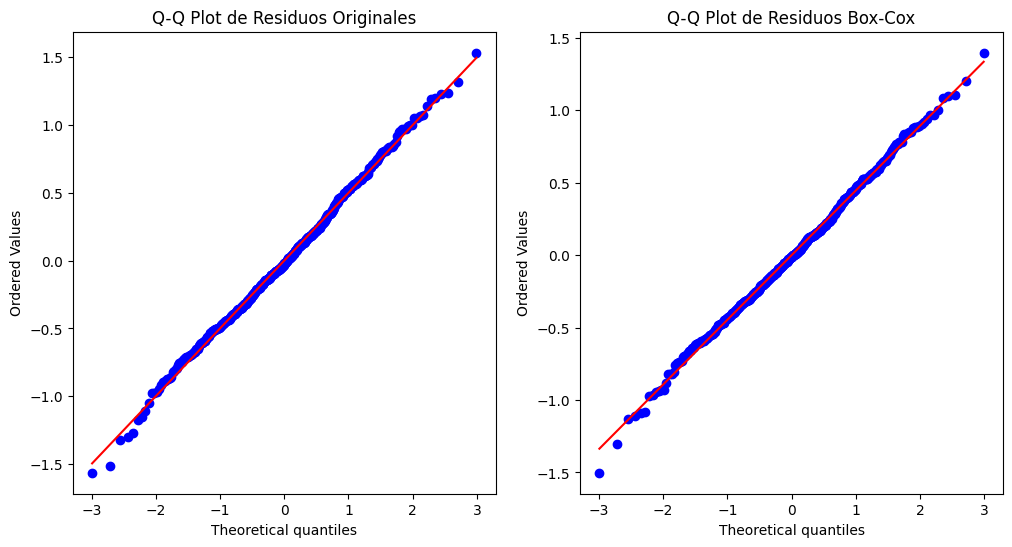

In [15]:
from scipy.stats import boxcox, shapiro, probplot
# Gráfica Q-Q para los residuos originales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(residuos_original, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos Originales')

# Gráfica Q-Q para los residuos de Box-Cox
plt.subplot(1, 2, 2)
probplot(residuos_boxcox, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos Box-Cox')
plt.show()

La gráfica muestra cómo los cuantiles de los residuos originales se comparan con los cuantiles de una distribución normal. Si los puntos se alinean a lo largo de la línea diagonal, esto sugiere que los residuos siguen una distribución normal.

In [16]:
# Prueba de Shapiro-Wilk para los residuos originales
stat, p = shapiro(residuos_original)
print('Shapiro-Wilk Test para Residuos Originales')
print('Estadístico=%.3f, p=%.3f' % (stat, p))

# Prueba de Shapiro-Wilk para los residuos de Box-Cox
stat, p = shapiro(residuos_boxcox)
print('\nShapiro-Wilk Test para Residuos Box-Cox')
print('Estadístico=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test para Residuos Originales
Estadístico=0.998, p=0.732

Shapiro-Wilk Test para Residuos Box-Cox
Estadístico=0.998, p=0.909


Un $p$-valor mayor que 0.05 sugiere que no se rechaza la hipótesis nula de normalidad.

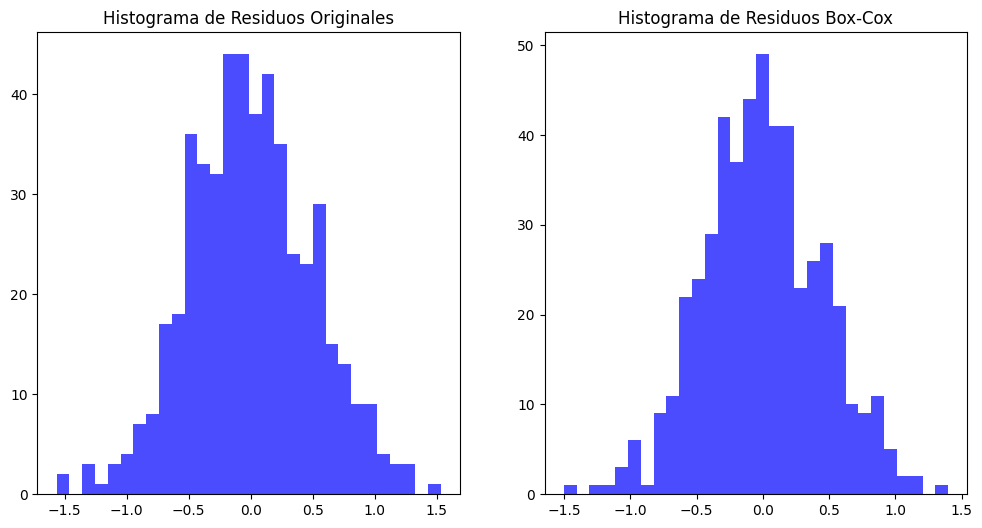

In [17]:
# Histograma de Residuos Originales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuos_original, bins=30, alpha=0.7, color='blue')
plt.title('Histograma de Residuos Originales')

# Histograma de Residuos Box-Cox
plt.subplot(1, 2, 2)
plt.hist(residuos_boxcox, bins=30, alpha=0.7, color='blue')
plt.title('Histograma de Residuos Box-Cox')
plt.show()

Un histograma con forma de campana simétrica sugiere que los residuos pueden seguir una distribución normal.



# Regresión logística

La regresión logística es una técnica de modelado estadístico utilizada para predecir el resultado de una variable categórica (binaria) basada en una o más variables independientes. A diferencia de la regresión lineal, que predice un valor continuo, la regresión logística predice la probabilidad de que un evento ocurra (por ejemplo, sí/no, éxito/fracaso, 0/1).



## Fórmulación Estadística de la Regresión Logística

#### Modelo Logit:
La regresión logística se basa en el modelo logit, que se formula de la siguiente manera:

$$\text{logit}(P(Y=1)) = \ln\left(\frac{P(Y=1)}{P(Y=0)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k$$

donde:

* $P(Y=1)$ es la probabilidad de que el evento $Y$ ocurra.
* $\beta_0$ es el intercepto.
* $\beta_1, \beta_2, \ldots, \beta_k$ son los coeficientes de las variables independientes $X_1, X_2, \ldots, X_k$.



#### Transformación de la Probabilidad

Para convertir el modelo logit en una probabilidad, se usa la función logística:

$$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k)}}
$$

Esta función garantiza que la probabilidad predicha esté entre 0 y 1.

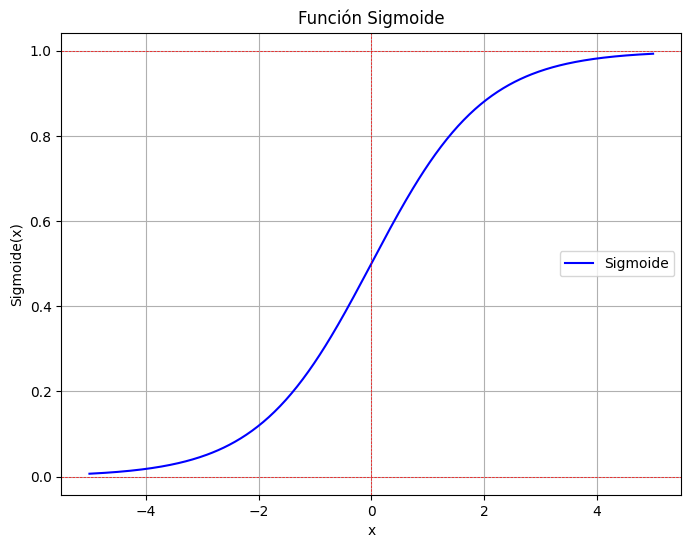

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Crear un rango de valores x
x = np.linspace(-5, 5, 400)
y = sigmoid(x)

# Graficar la función sigmoide
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoide', color='blue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Sigmoide(x)')
plt.title('Función Sigmoide')
plt.legend()
plt.grid(True)
plt.show()


#### Interpretación de los Coeficientes

Los coeficientes $\beta_i$  se estiman utilizando el método de máxima verosimilitud, que busca los valores que maximizan la probabilidad de observar los datos dados.

####¿Qué es el Log-Odds?

El log-odds (logaritmo de las probabilidades) es una transformación de las probabilidades que convierte las probabilidades de un evento en un valor continuo que puede variar desde menos infinito hasta más infinito. Esto es especialmente útil en modelos de regresión logística, donde queremos modelar la probabilidad de un evento en función de una combinación lineal de variables predictoras.

**Fórmula del Log-Odds**

La fórmula para calcular el log-odds de un evento $Y=1$ es:

$$\text{log-odds}(P(Y=1)) = \ln\left( \cfrac{P(Y=1)}{P(Y=0)} \right)$$

Donde,

* $P(Y=1)$ es la probabilidad de que el evento ocurra.

* $P(Y=0)$ es la probabilidad de que el evento no ocurra.

Por ejemplo, si $log-odds = \ln(4) \approx 1.386$, entendemos que $odds =4$, es decir que


$$\cfrac{P(Y=1)}{P(Y=0)} = 4$$

Esto significa que el evento es 4 veces más probable de ocurrir que de no ocurrir.

Ptro ejemplo, si $log-odds = \ln(1) =0$, entendemos que $odds =1$, es decir que


$$\cfrac{P(Y=1)}{P(Y=0)} = 1$$

Esto significa que es igual de probable que un evento ocurra como de que no.

### Interpretación de cada coeficiente:

* Intercepción $𝛽_0$: Representa el log-odds de la variable dependiente cuando todas las variables independientes son 0.

* Coeficientes $𝛽_i$: Cada coeficiente representa el cambio en el log-odds de la variable dependiente  por unidad de cambio en la variable independiente correspondiente, manteniendo constantes las demás variables.


### Ejemplo

Supongamos que queremos predecir si una persona tiene un título avanzado (maestría o doctorado) basado en sus años de educación y experiencia laboral.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Semilla para la reproducibilidad
np.random.seed(236)

# Generación de datos simulados
n = 500
educacion = np.random.normal(12, 2, n)  # años de educación alrededor de 12 años
experiencia = np.random.normal(10, 5, n)  # años de experiencia laboral
# Probabilidad de tener título avanzado basada en educación y experiencia
p_titulo = 1 / (1 + np.exp(-(0.3 * educacion + 0.1 * experiencia - 4)))
titulo_avanzado = np.random.binomial(1, p_titulo)

# Crear DataFrame
data = pd.DataFrame({
    'educacion': educacion,
    'experiencia': experiencia,
    'titulo_avanzado': titulo_avanzado
})

data.head()

,educacion,experiencia,titulo_avanzado
0,13.901124,10.070583,1
1,11.198462,18.866980,1
2,13.941956,9.320885,0
3,13.571820,-0.350479,1
4,13.334150,7.948505,1


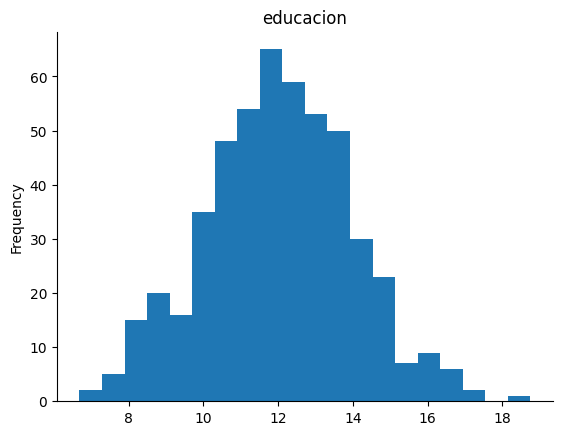

In [20]:
from matplotlib import pyplot as plt
data['educacion'].plot(kind='hist', bins=20, title='educacion')
plt.gca().spines[['top', 'right',]].set_visible(False)

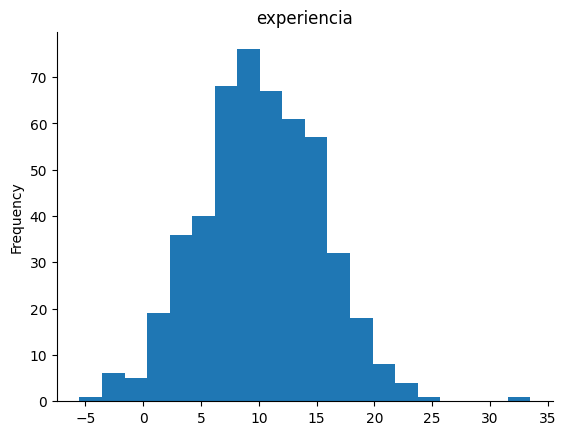

In [21]:
data['experiencia'].plot(kind='hist', bins=20, title='experiencia')
plt.gca().spines[['top', 'right',]].set_visible(False)

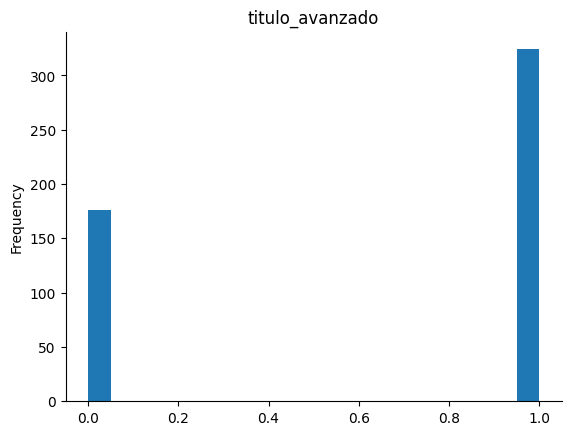

In [22]:
data['titulo_avanzado'].plot(kind='hist', bins=20, title='titulo_avanzado')
plt.gca().spines[['top', 'right',]].set_visible(False)

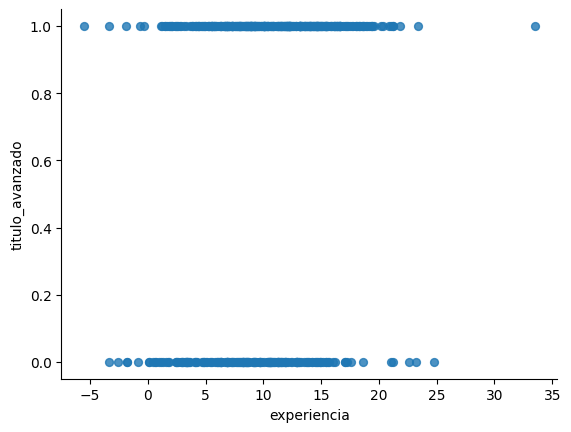

In [23]:
# Experiencia vs titulo_avanzado

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='experiencia', y='titulo_avanzado', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

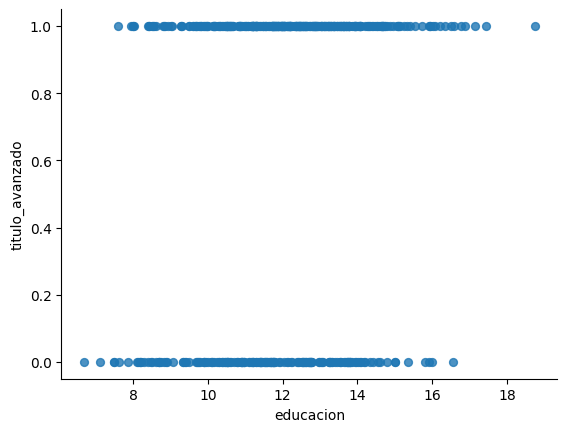

In [24]:
# Educación vs titulo_avanzado

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='educacion', y='titulo_avanzado', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Ajustar el modelo de regresión logística

In [25]:
X = sm.add_constant(data[['educacion', 'experiencia']]) # Matriz de variables independientes
modelo_logit = sm.Logit(data['titulo_avanzado'], X).fit()

print(modelo_logit.summary())# Mostrar los resultados del modelo

Optimization terminated successfully.
         Current function value: 0.613156
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        titulo_avanzado   No. Observations:                  500
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 May 2024   Pseudo R-squ.:                 0.05476
Time:                        01:21:08   Log-Likelihood:                -306.58
converged:                       True   LL-Null:                       -324.34
Covariance Type:            nonrobust   LLR p-value:                 1.936e-08
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8106      0.670     -4.198      0.000      -4.123      -1.498
educacion       0.2179    

** Interpretación:**

* El coeficiente de educacion es 0.21, esto quiere decir que el log-odds de tener un título avanzado aumenta en 0.21, en otras palabras $e^{0.21}\approx 1.23$, aumentar un año de educación hace 1.23 más probable que la persona tenga un título avanzado que no lo tenga.

* El coeficiente de experiencia es 0.083, esto quiere decir que el log-odds de tener un título avanzado aumenta en 0.083, en otras palabras $e^{0.083}\approx 1.0865$, aumentar un año de educación hace 1.0865 más probable que la persona tenga un título avanzado que no lo tenga.

* El coeficiente independientes es -2.81, por tanto si una persona que no tiene educación ni experiencia disminuye la probabilidad de tener un título avanzado en 2.81, en términos de odds, la razón entre la probabilidad de tener y no tener extudios avanzados es de $e^{-2.81}\approx 0.06$ por lo que es más probable que no tenga títulos avanzados a que los tenga.

Veamos algunas predicciones realizadas con este modelo:

En este caso incluiremos dos columanas a la base de datos:

* `prediccion_prob` son las probabilidades predichas de tener un título avanzado.

* `prediccion` convierte las probabilidades en predicciones binarias usando un umbral de 0.5.

In [26]:
data['prediccion_prob'] = modelo_logit.predict(X)
data['prediccion'] = (data['prediccion_prob'] >= 0.5).astype(int)
data.head(10)

,educacion,experiencia,titulo_avanzado,prediccion_prob,prediccion
0,13.901124,10.070583,1,0.743501,1
1,11.198462,18.866980,1,0.770903,1
2,13.941956,9.320885,0,0.733065,1
3,13.571820,-0.350479,1,0.529443,1
4,13.334150,7.948505,1,0.681914,1
5,12.476658,8.680406,1,0.654101,1
6,13.848626,6.984663,0,0.688652,1
7,10.909136,8.766683,0,0.575106,1
8,11.728217,9.311111,1,0.628765,1
9,11.699237,4.834658,0,0.536170,1


Veamos gráficamente estas predicciones:

In [27]:
data['b0+b1*ed+b20ex'] = modelo_logit.params[0]+modelo_logit.params[1]*data['educacion']+modelo_logit.params[2]*data['experiencia']
data.head(3)

,educacion,experiencia,titulo_avanzado,prediccion_prob,prediccion,b0+b1*ed+b20ex
0,13.901124,10.070583,1,0.743501,1,1.064244
1,11.198462,18.866980,1,0.770903,1,1.213418
2,13.941956,9.320885,0,0.733065,1,1.010227


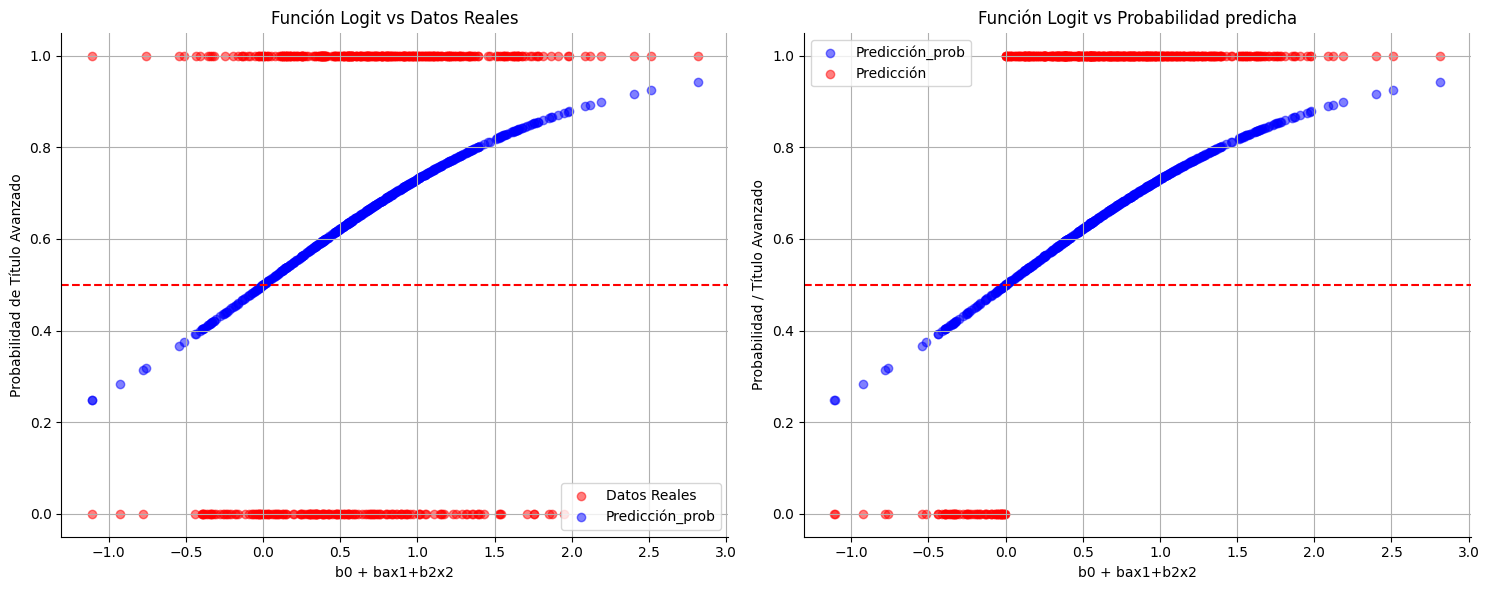

In [28]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera gráfica: Función Logit vs Datos Reales
axs[0].scatter(data['b0+b1*ed+b20ex'], data['titulo_avanzado'], color='red', alpha=0.5, label='Datos Reales')
axs[0].scatter(data['b0+b1*ed+b20ex'], modelo_logit.predict(sm.add_constant(data[['educacion', 'experiencia']])), color='blue', alpha=0.5, label='Predicción_prob')
axs[0].axhline(y=0.5, color='red', linestyle='--')
axs[0].set_xlabel('b0 + bax1+b2x2')
axs[0].set_ylabel('Probabilidad de Título Avanzado')
axs[0].set_title('Función Logit vs Datos Reales')
axs[0].legend()
axs[0].grid(True)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda gráfica: Probabilidad Predicha vs Variable Binaria Observada
axs[1].scatter(data['b0+b1*ed+b20ex'], modelo_logit.predict(sm.add_constant(data[['educacion', 'experiencia']])), color='blue', alpha=0.5, label='Predicción_prob')
axs[1].scatter(data['b0+b1*ed+b20ex'], data['prediccion'], color='red', alpha=0.5, label='Predicción')
axs[1].axhline(y=0.5, color='red', linestyle='--')
axs[1].set_xlabel('b0 + bax1+b2x2')
axs[1].set_ylabel('Probabilidad / Título Avanzado')
axs[1].set_title('Función Logit vs Probabilidad predicha')
axs[1].legend()
axs[1].grid(True)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ¿Y cómo medimos la efectividad del modelo?
## Curva Roc

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. Esta curva muestra la relación entre la tasa de verdaderos positivos (True Positive Rate, TPR) y la tasa de falsos positivos (False Positive Rate, FPR) a diferentes umbrales de decisión.



### Pasos para Crear una Curva ROC y Evaluar la Calidad del Modelo

1. Calcular las TPR y FPR: Para diferentes umbrales de decisión, calcula la TPR y la FPR.
2. Graficar la Curva ROC: Graficar la TPR en función de la FPR.
3. Calcular el Área Bajo la Curva (AUC): El AUC es una medida de la capacidad del modelo para distinguir entre clases. Un AUC más cercano a 1 indica un mejor rendimiento del modelo.

In [29]:
# Calcular el AUC
fpr, tpr, _ = roc_curve(data['titulo_avanzado'], data['prediccion_prob'])
auc = roc_auc_score(data['titulo_avanzado'], data['prediccion_prob'])
auc

0.6615986251402918

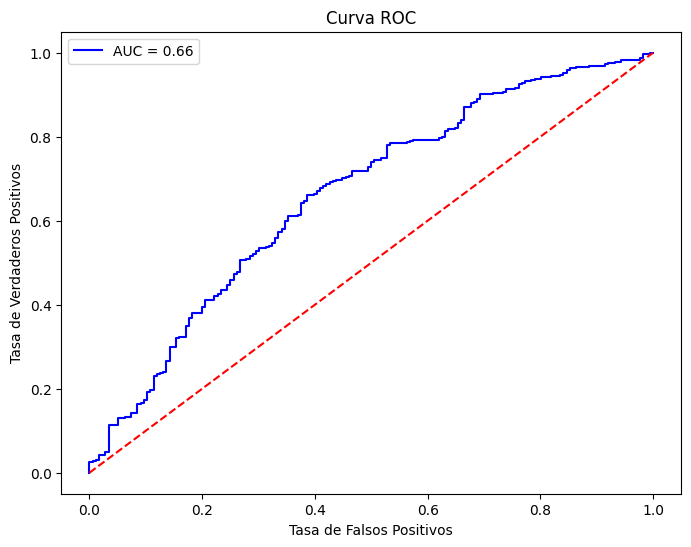

In [30]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

###  Interpretación de la curva ROC

Podemos interpretar la curva como que cada segmento verticar representa un porcentaje de la población que se ha predicho correctamente, mientras que cada vertical indican elementos con mala predicción.

# Valores del AUC

El valor del AUC puede variar entre 0 y 1:

* $AUC = 0.5$: El modelo no tiene capacidad de discriminar entre las clases. Esto es equivalente a hacer una predicción aleatoria.
* $0.5 < AUC < 1$: El modelo tiene cierta capacidad de discriminar entre las clases. Cuanto más cercano a 1, mejor es el rendimiento del modelo.
* $AUC = 1$: El modelo tiene una capacidad perfecta de discriminar entre las clases. Todas las predicciones son correctas.
$AUC < 0.5$: El modelo tiene un rendimiento peor que una clasificación aleatoria. Esto puede indicar que el modelo está invirtiendo las predicciones de manera consistente.

Interpretación del AUC
* $0.7 ≤ AUC < 0.8:$ Rendimiento aceptable
* $0.8 ≤ AUC < 0.9:$ Buen rendimiento
* $0.9 ≤ AUC < 1:$ Excelente rendimiento

## Matriz de Confusión

Otra de las técnicas usadas para evaluar un modelo es la matriz de confusión. Proporciona una visión detallada de las predicciones del modelo comparándolas con los valores reales.


|                | Predicho Negativo (0) | Predicho Positivo (1) |
|----------------|------------------------|------------------------|
| **Real Negativo (0)** | Verdaderos Negativos (TN)  | Falsos Positivos (FP)    |
| **Real Positivo (1)** | Falsos Negativos (FN)     | Verdaderos Positivos (TP) |

### Definiciones

- **Verdaderos Negativos (TN)**: El número de casos negativos que el modelo predijo correctamente como negativos.
- **Falsos Positivos (FP)**: El número de casos negativos que el modelo predijo incorrectamente como positivos (también conocido como error de tipo I).
- **Falsos Negativos (FN)**: El número de casos positivos que el modelo predijo incorrectamente como negativos (también conocido como error de tipo II).
- **Verdaderos Positivos (TP)**: El número de casos positivos que el modelo predijo correctamente como positivos.


En nuestro ejemplo:

In [31]:
# Matriz de confusión
cm = confusion_matrix(data['titulo_avanzado'], data['prediccion'])
print('\nMatriz de Confusión:')
print(cm)


Matriz de Confusión:
[[ 41 135]
 [ 24 300]]


Es decir que

|                | Predicho Negativo (0) | Predicho Positivo (1) |
|----------------|------------------------|------------------------|
| **Real Negativo (0)** | Verdaderos Negativos (TN =41)  | Falsos Positivos (FP=135)    |
| **Real Positivo (1)** | Falsos Negativos (FN=24)     | Verdaderos Positivos (TP=300) |

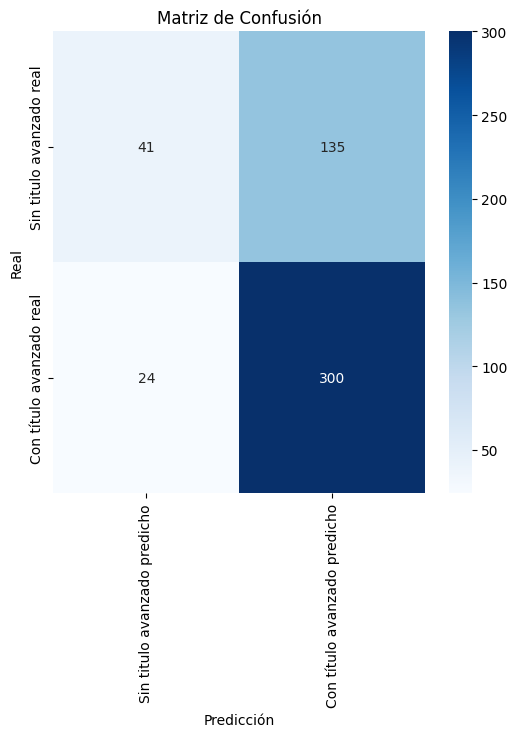

In [34]:
import seaborn as sns
# Matriz de confusión
cm = confusion_matrix(data['titulo_avanzado'], data['prediccion'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin titulo avanzado predicho', 'Con título avanzado predicho'], yticklabels=['Sin titulo avanzado real', 'Con título avanzado real'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


### Métricas Derivadas de la Matriz de Confusión

1. **Precisión (Accuracy)**:


   $$
   \text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

   Es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de casos.

   $$
   \text{Precisión} = \frac{300 + 41}{284 + 55 + 124 + 37} = \frac{341}{500} = 0.682
   $$



2. **Precisión (Precision)**:
   $$
   \text{Precisión} = \frac{TP}{TP + FP}
   $$

   $$
   \text{Precisión} = \frac{300}{300 + 135} = \frac{300}{435} \approx 0.6896
   $$

  Es la proporción de verdaderos positivos sobre todos los casos que el modelo predijo como positivos.


Es decir que

|                | Predicho Negativo (0) | Predicho Positivo (1) |
|----------------|------------------------|------------------------|
| **Real Negativo (0)** | Verdaderos Negativos (TN =41)  | Falsos Positivos (FP=135)    |
| **Real Positivo (1)** | Falsos Negativos (FN=24)     | Verdaderos Positivos (TP=300) |


3. **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**:

   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

   Es la proporción de verdaderos positivos sobre todos los casos que son realmente positivos.
   $$
   \text{Recall} = \frac{300}{300 + 24} = \frac{300}{324} \approx 0.926
   $$

4. **Tasa de Falsos Positivos (FPR)**:
   $$
   \text{FPR} = \frac{FP}{FP + TN}
   $$

  Es la proporción de falsos positivos sobre todos los casos que son realmente negativos.

   $$
   \text{FPR} = \frac{135}{135 + 41} = \frac{135}{176} \approx 0.767
   $$

5. **F1-Score**:
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
   $$
   Es la media armónica de la precisión y el recall, y proporciona una medida equilibrada del rendimiento del modelo cuando hay una distribución desigual entre las clases.
   $$
   \text{F1-Score} = 2 \times \frac{0.682 \times 0.926}{0.682 + 0.926} \approx 2 \times 0.393 = 0.78
   $$


In [ ]:
# Reporte de clasificación
report = classification_report(data['titulo_avanzado'], data['prediccion'])
print('\nReporte de Clasificación:')
print(report)

### Pautas Generales de lectura

* **Valores Cercanos a 1 (100%):** Indicativos de un buen rendimiento del modelo. Sin embargo, obtener valores muy altos puede ser difícil, especialmente en problemas complicados o con datos ruidosos.
* **Valores Bajos (cerca de 0):** Indicativos de un mal rendimiento del modelo. Si las métricas están muy por debajo de 0.5, el modelo está casi al nivel de la predicción aleatoria.
* **Valores Intermedios (0.5-0.7):** Pueden ser aceptables dependiendo del contexto. A menudo se necesita comparar estos valores con un umbral específico que depende del dominio de aplicación.

Conclusión del Ejemplo

* Puntos Fuertes:

  El modelo tiene un buen recall para la clase 1 (93%), lo cual es importante si queremos minimizar los falsos negativos en la clase positiva.

* Puntos Débiles:

  El recall para la clase 0 son bastante bajos, lo que indica que el modelo tiene dificultades para identificar correctamente los casos negativos.
  
  La precisión global (68%) y el F1-score son moderados, indicando que el modelo tiene margen de mejora.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score
import statsmodels.api as sm

# Semilla para la reproducibilidad
np.random.seed(42)

# Generación de datos simulados
n = 500
educacion = np.random.normal(12, 2, n)  # años de educación alrededor de 12 años
experiencia = np.random.normal(10, 5, n)  # años de experiencia laboral
# Probabilidad de tener título avanzado basada en educación y experiencia
p_titulo = 1 / (1 + np.exp(-(0.3 * educacion + 0.1 * experiencia - 4)))
titulo_avanzado = np.random.binomial(1, p_titulo)

# Crear DataFrame
data = pd.DataFrame({
    'educacion': educacion,
    'experiencia': experiencia,
    'titulo_avanzado': titulo_avanzado
})

# Ajustar el modelo de regresión logística
X = sm.add_constant(data[['educacion', 'experiencia']])
modelo_logit = sm.Logit(data['titulo_avanzado'], X).fit()

# Obtener las probabilidades predichas
data['prediccion_prob'] = modelo_logit.predict(X)

# Calcular las métricas para varios umbrales
precisions, recalls, thresholds = precision_recall_curve(data['titulo_avanzado'], data['prediccion_prob'])
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Graficar Precision-Recall y F1-Score
plt.figure(figsize=(14, 6))

# Curva Precision-Recall
plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precisión')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.title('Curvas de Precisión-Recall')
plt.legend()

# F1-Score
plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1-Score')
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Mejor Umbral: {best_threshold:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Umbral')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir el mejor umbral y la F1-score correspondiente
print(f'Mejor Umbral: {best_threshold:.2f}')
print(f'Mejor F1-Score: {f1_scores[best_threshold_index]:.2f}')


Usemos estos datos para revisar el modelo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Semilla para la reproducibilidad
np.random.seed(236)

# Generación de datos simulados
n = 500
educacion = np.random.normal(12, 2, n)  # años de educación alrededor de 12 años
experiencia = np.random.normal(10, 5, n)  # años de experiencia laboral
# Probabilidad de tener título avanzado basada en educación y experiencia
p_titulo = 1 / (1 + np.exp(-(0.3 * educacion + 0.1 * experiencia - 4)))
titulo_avanzado = np.random.binomial(1, p_titulo)

# Crear DataFrame
data = pd.DataFrame({
    'educacion': educacion,
    'experiencia': experiencia,
    'titulo_avanzado': titulo_avanzado
})

data.head()

In [ ]:
X = sm.add_constant(data[['educacion', 'experiencia']]) # Matriz de variables independientes
modelo_logit = sm.Logit(data['titulo_avanzado'], X).fit()

print(modelo_logit.summary())# Mostrar los resultados del modelo

In [ ]:
data['prediccion_prob'] = modelo_logit.predict(X)
data['prediccion'] = (data['prediccion_prob'] >= 0.47).astype(int)
data.head(10)

In [ ]:
# Matriz de confusión
cm = confusion_matrix(data['titulo_avanzado'], data['prediccion'])
print('\nMatriz de Confusión:')
print(cm)

In [ ]:
# Reporte de clasificación
report = classification_report(data['titulo_avanzado'], data['prediccion'])
print('\nReporte de Clasificación:')
print(report)

¿Y si subimos el umbral?

In [ ]:
data['prediccion_prob'] = modelo_logit.predict(X)
data['prediccion'] = (data['prediccion_prob'] >= 0.9).astype(int)
data.head(10)

In [ ]:
# Matriz de confusión
cm = confusion_matrix(data['titulo_avanzado'], data['prediccion'])
print('\nMatriz de Confusión:')
print(cm)

In [ ]:
# Reporte de clasificación
report = classification_report(data['titulo_avanzado'], data['prediccion'])
print('\nReporte de Clasificación:')
print(report)

¿Y si bajamos el umbral?

In [ ]:
data['prediccion_prob'] = modelo_logit.predict(X)
data['prediccion'] = (data['prediccion_prob'] >= 0.3).astype(int)
data.head(10)

In [ ]:
# Matriz de confusión
cm = confusion_matrix(data['titulo_avanzado'], data['prediccion'])
print('\nMatriz de Confusión:')
print(cm)

In [ ]:
# Reporte de clasificación
report = classification_report(data['titulo_avanzado'], data['prediccion'])
print('\nReporte de Clasificación:')
print(report)